In [21]:
import torch
from torch.utils.data import DataLoader, Subset, random_split
from torchvision import datasets, transforms
import random
import cv2
import matplotlib.pyplot as plt

In [22]:
import os
from PIL import Image
from collections import Counter
import seaborn as sns
import pandas as pd


In [23]:
DATASET_DIR = "Waste_Classification_Dataset/"

# Total number of images and classes
classes = [cls for cls in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, cls))]
print(f"📂 Number of classes: {len(classes)}, name of classes: {classes}")

📂 Number of classes: 4, name of classes: ['Metal', 'Miscellaneous', 'Paper', 'Plastic']


In [24]:
# Count images per class
image_counts = {}
for cls in classes:
    folder = os.path.join(DATASET_DIR, cls)
    count = len([f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    image_counts[cls] = count

# Display counts
df_counts = pd.DataFrame.from_dict(image_counts, orient='index', columns=['Image Count'])
df_counts.loc['Total'] = df_counts['Image Count'].sum()
print("\n Image count per class:")
print(df_counts)



 Image count per class:
               Image Count
Metal                 2283
Miscellaneous         4424
Paper                 2767
Plastic               6807
Total                16281


In [25]:
# Check image sizes 
sizes = []
for cls in classes:
    folder = os.path.join(DATASET_DIR, cls)
    for f in os.listdir(folder)[:10]:  # check 10 sample images per class
        img_path = os.path.join(folder, f)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
        except:
            pass

sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
print("\n Image size summary:")
print(sizes_df.describe())


 Image size summary:
            Width      Height
count   40.000000   40.000000
mean   375.725000  375.725000
std     70.584369   70.584369
min    299.000000  299.000000
25%    327.500000  327.500000
50%    358.500000  358.500000
75%    391.500000  391.500000
max    489.000000  489.000000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19936\1505461938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")


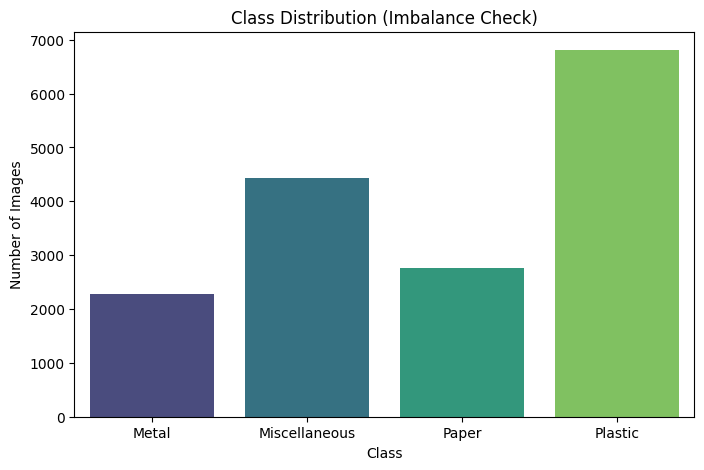

In [26]:
# Visualize class imbalance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")
plt.title("Class Distribution (Imbalance Check)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

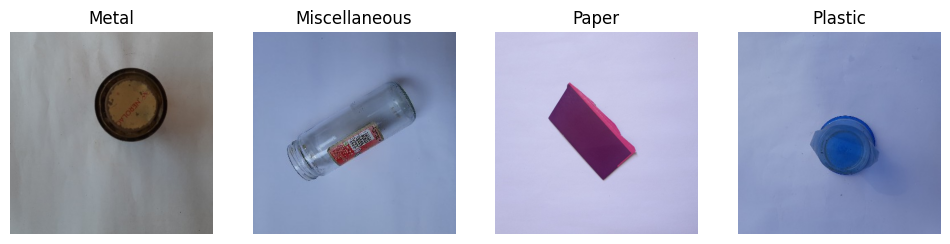

In [27]:
# Display example images (1 from each class)
plt.figure(figsize=(12, 6))
for i, cls in enumerate(classes):
    folder = os.path.join(DATASET_DIR, cls)
    first_img = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))][0]
    img_path = os.path.join(folder, first_img)
    img = Image.open(img_path)
    plt.subplot(1, len(classes), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()


In [28]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [29]:
# Load all the images
waste_dataset = datasets.ImageFolder(root = r'D:\Waste_Classification_Project\Waste_Classification_Dataset', transform= transform)

In [30]:
# # Due to the limitations in processing capability , we only use a small subset of the total dataset
# N = 100     # Number of images
# indices = random.sample(range(len(waste_dataset)), N)
# subset = Subset(waste_dataset, indices)

In [31]:
# Calculate the size of each dataset
train_size = int(len(waste_dataset) * 0.7) 
val_size = int(0.15 * len(waste_dataset))
test_size = len(waste_dataset) - train_size - val_size
# Split the dataset
train, val, test = random_split(waste_dataset, [train_size, val_size, test_size], generator = torch.Generator().manual_seed(42))

In [33]:
train_loader = DataLoader(train, batch_size= 12, shuffle = True)
val_loader = DataLoader(val, batch_size = 12, shuffle = True)
test_loader = DataLoader(test, batch_size = 12, shuffle = True)

In [35]:
print(f"\n Dataset split summary:")
print(f" - Train: {len(train_loader)}")
print(f" - Validation: {len(val_loader)}")
print(f" - Test: {len(test_loader)}")


 Dataset split summary:
 - Train: 950
 - Validation: 204
 - Test: 204
